# Rosey Training Notebook 

Basic supervised neural network

In [1]:
import sys
print(sys.path)
try:
    sys.path.remove('/opt/ros/melodic/lib/python2.7/dist-packages')
except:
    pass
sys.path.append('/home/michael/Github/ai_training_notebooks/standard_utils')
from general_ai_training_utils import BaseSupervisedTrainer
import rosey

['/home/michael/Github/ai_training_notebooks/basic_supervised_net/rosey', '', '/opt/ros/melodic/lib/python2.7/dist-packages', '/home/michael/anaconda3/envs/deeplearning/lib/python37.zip', '/home/michael/anaconda3/envs/deeplearning/lib/python3.7', '/home/michael/anaconda3/envs/deeplearning/lib/python3.7/lib-dynload', '/home/michael/anaconda3/envs/deeplearning/lib/python3.7/site-packages', '/home/michael/anaconda3/envs/deeplearning/lib/python3.7/site-packages/IPython/extensions', '/home/michael/.ipython']


### Instantiate a base supervised learner with the Rosey model 

In [2]:
model = rosey.Rosey("utils")
model_trainer = BaseSupervisedTrainer(export_directory="/home/michael/Desktop", model=model, utils_file="utils", data_directory="/media/michael/BigMemory/datasets/jetsoncar/backup1-12-20/data")

Available datasets in /media/michael/BigMemory/datasets/jetsoncar/backup1-12-20/data: 
['dataset', 'manifest.xml']


Would you like to combine multiple datasets in the root dataset directory for training? (y/n) 


Using default /media/michael/BigMemory/datasets/jetsoncar/backup1-12-20/data/dataset for data
Datasets to read from: ['dataset']


Reading sample image


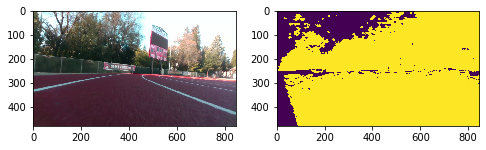

In [3]:
model_trainer.set_dataset()

In [4]:
model_trainer.load_dataset(dynamic=True, percent_training=0.8, existing_npy_directory=None,  npy_save_directory=None, total_npy_size=100, num_stacked_images=1)
print("data loaded") # Remove this line to see returned values for training and steering (include test values if dynamic load)

Loading dataset for training set...
Number of data samples is 9760
Loading data file paths for dynamic loading during training/evaluation...
data loaded


In [ ]:
from keras.optimizers import Adam
model_trainer.build_model(loss='mean_squared_error', optimizer=Adam(1.0e-4), regularizer=0.01)

In [ ]:
model_trainer.train_model(batch_size=40, validation_steps=1000, nb_epochs=10, steps_per_epoch=1500)

## Update config.yaml and notes.txt to properly document and specify the opartion and development of the model

### notes.txt
Here you should put notes about model performance, test conditions, and todo list for improving the model. 

### config.yaml
Specify the maximum update rate for the model when run on the jetson TX2

In [ ]:
# preapare desired model file for export
import os
model_to_export = "model.009-2.58.h5"
os.rename(model_to_export, 'model.h5')

In [6]:
# copy the relevant files and export model
model_name = "RoseyV2"
if model_trainer.export_model("/home/michael/Desktop/" + model_name):
    print("Model export successful!")

Saving model to /home/michael/Desktop/RoseyV2
Optimizing model with tensorRT
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /home/michael/Desktop/RoseyV2/assets
INFO:tensorflow:Linked TensorRT version: (0, 0, 0)
INFO:tensorflow:Loaded TensorRT version: (0, 0, 0)
INFO:tensorflow:Running against TensorRT version 0.0.0
INFO:tensorflow:Assets written to: /home/michael/Desktop/RoseyV2/rt/assets


{'dense_4': <tf.Tensor: id=8107, shape=(1, 1), dtype=float32, numpy=array([[-0.08080125]], dtype=float32)>}
Output: -0.08080124855041503906


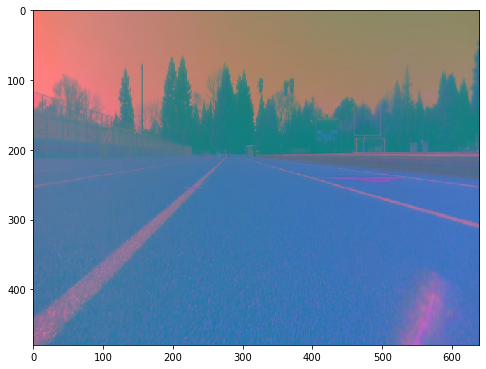

In [7]:
model_name = "RoseyV2"
model_trainer.test_tftrt_model(export_path=("/home/michael/Desktop/" + model_name))